In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
import re

# Initialize an empty list to store data for the DataFrame
data = []

# Define the path to your text file
file_path = '/content/drive/MyDrive/Abreviation/CASI/CASI.txt'

# Read the file line by line
with open(file_path, 'r',encoding='utf-8', errors='ignore') as file:
  for line in file:
    # Split the line by the '|' delimiter
    parts = line.split('|')

    # Extract elements based on the expected format
    if len(parts) >= 7:  # Ensure the line has the expected number of fields
        abr = parts[0]
        long_form = parts[1]
        abr_text = parts[2]
        start_abr = int(parts[3])
        end_abr = int(parts[4])
        section = parts[5]  # May be empty if no section is specified
        text = parts[6]

        # Append the extracted fields to the data list as a dictionary
        data.append({
            'abr': abr,
            'long': long_form,
            'abr_text': abr_text,
            'start_abr': start_abr,
            'end_abr': end_abr,
            'section': section,
            'text': text
        })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the resulting DataFrame
print(df)


       abr                                      long abr_text  start_abr  \
0       AB                                  abortion      AB.        231   
1       AB                                  abortion      AB.        249   
2       AB                                  abortion       AB        223   
3       AB                                  abortion      AB.        194   
4       AB                                  abortion       AB        114   
...    ...                                       ...      ...        ...   
37495  VAD  vincristine adriamycin and dexamethasone     VAD.        139   
37496  VAD  vincristine adriamycin and dexamethasone     VAD,        172   
37497  VAD  vincristine adriamycin and dexamethasone      VAD        250   
37498  VAD  vincristine adriamycin and dexamethasone      VAD        181   
37499  VAD  vincristine adriamycin and dexamethasone      VAD         60   

       end_abr                         section  \
0          233                       

In [ ]:
data=pd.DataFrame(df, columns=('abr','long','text'))

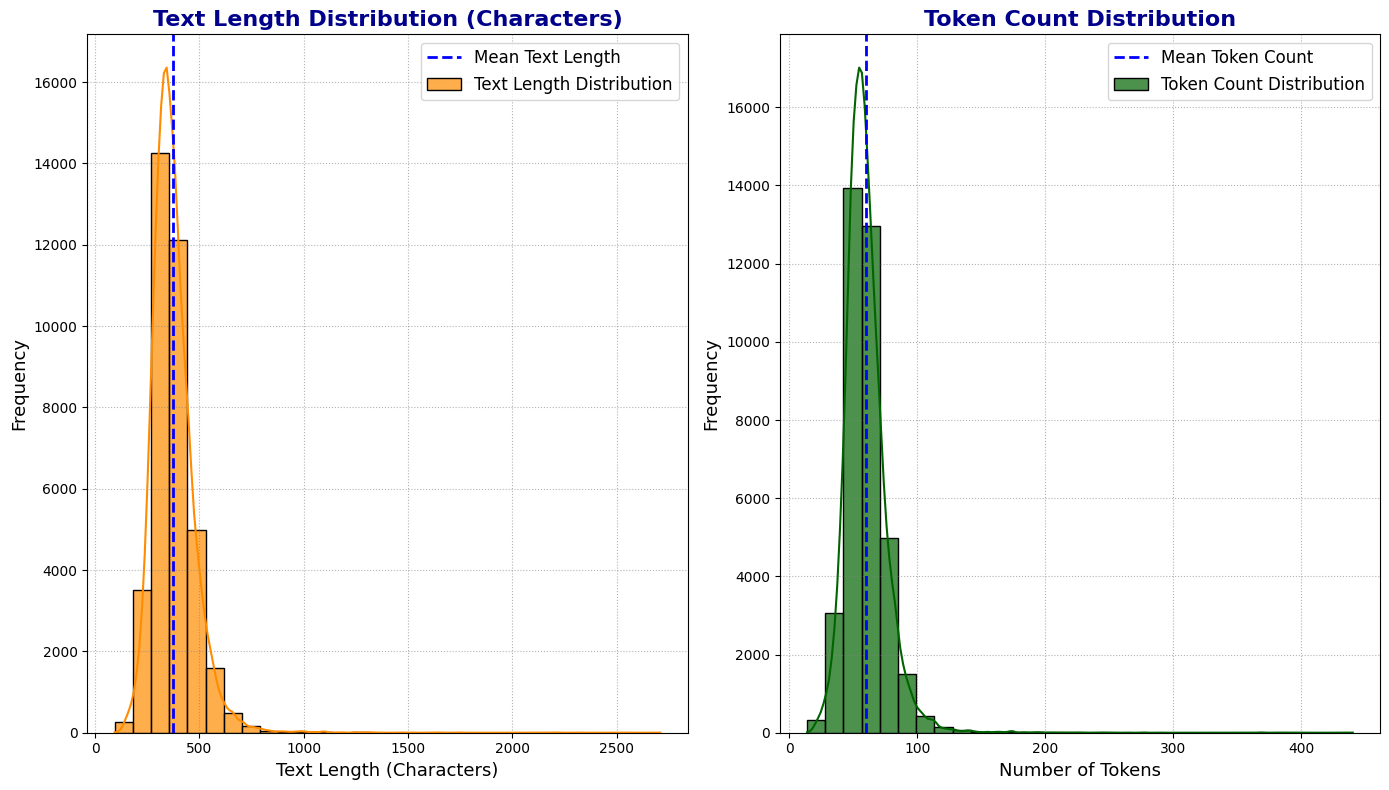

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Example: Tokenizing and calculating text lengths and token counts
df['text_length'] = df['text'].apply(len)  # Character count
df['token_count'] = df['text'].apply(lambda x: len(x.split()))  # Token count using NLTK's word_tokenize

# Set up a figure with subplots for both distributions
plt.figure(figsize=(14, 8))

# Plotting the text length distribution (in characters)
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(df['text_length'], bins=30, kde=True, color='darkorange', alpha=0.7, label='Text Length Distribution')
plt.axvline(df['text_length'].mean(), color='blue', linestyle='--', linewidth=2, label='Mean Text Length')
#plt.axvline(df['text_length'].median(), color='green', linestyle='-', linewidth=2, label='Median Text Length')
plt.title('Text Length Distribution (Characters)', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Text Length (Characters)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(visible=True, linestyle=':', color='gray', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Plotting the token count distribution
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(df['token_count'], bins=30, kde=True, color='darkgreen', alpha=0.7, label='Token Count Distribution')
plt.axvline(df['token_count'].mean(), color='blue', linestyle='--', linewidth=2, label='Mean Token Count')
#plt.axvline(df['token_count'].median(), color='green', linestyle='-', linewidth=2, label='Median Token Count')
plt.title('Token Count Distribution', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Tokens', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(visible=True, linestyle=':', color='gray', alpha=0.6)
plt.legend(fontsize=12, loc='upper right')

# Adjust layout to ensure there is no overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
# Calculate the mean length of the 'TEXT' column (number of characters)
max_text_length = df['text'].apply(len).max()

# Calculate the mean length of the 'LABEL' column (number of characters)
max_label_length =df['long'].apply(len).max()
# Calculate the mean length of the 'abr' column (number of characters)
max_abr_length =df['abr'].apply(len).max()
# Print the results
print(f"Max length of 'TEXT': {max_text_length}")
print(f"Maxn length of 'LABEL': {max_label_length}")
print(f"Maxn length of 'abr': {max_abr_length}")
from transformers import BartTokenizer





Max length of 'TEXT': 2708
Maxn length of 'LABEL': 60
Maxn length of 'abr': 4


In [ ]:
'''# Load the tokenizer
from transformers import BartTokenizer'''
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Calculate max token length for the `abr` column
max_abr_token_length = df['abr'].apply(lambda x: len(tokenizer.tokenize(x))).max()
print(f"Maximum token length in `abr`: {max_abr_token_length}")
# Calculate max token length for the `text` column
max_text_token_length = df['text'].apply(lambda x: len(tokenizer.tokenize(x))).max()
print(f"Maximum token length in `text`: {max_text_token_length}")
# Calculate max token length for the `long` column
max_long_token_length = df['long'].apply(lambda x: len(tokenizer.tokenize(x))).max()
print(f"Maximum token length in `long`: {max_long_token_length}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Maximum token length in `abr`: 3
Maximum token length in `text`: 899
Maximum token length in `long`: 20


In [ ]:
'''dff = df1.sample(n=15, random_state=42)  # `random_state` ensures reproducibility'''

dff=df1
print(dff.shape)

(37500, 3)


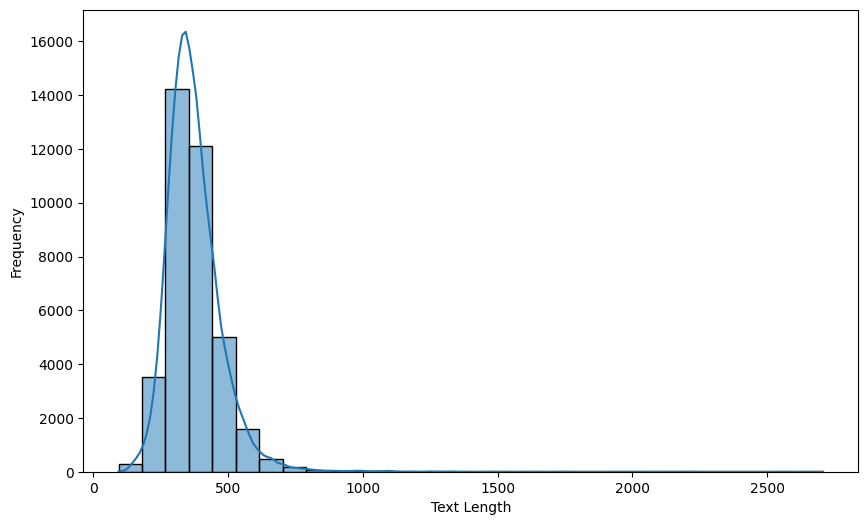

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Distribution of Text Lengths
# Calculate text lengths
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

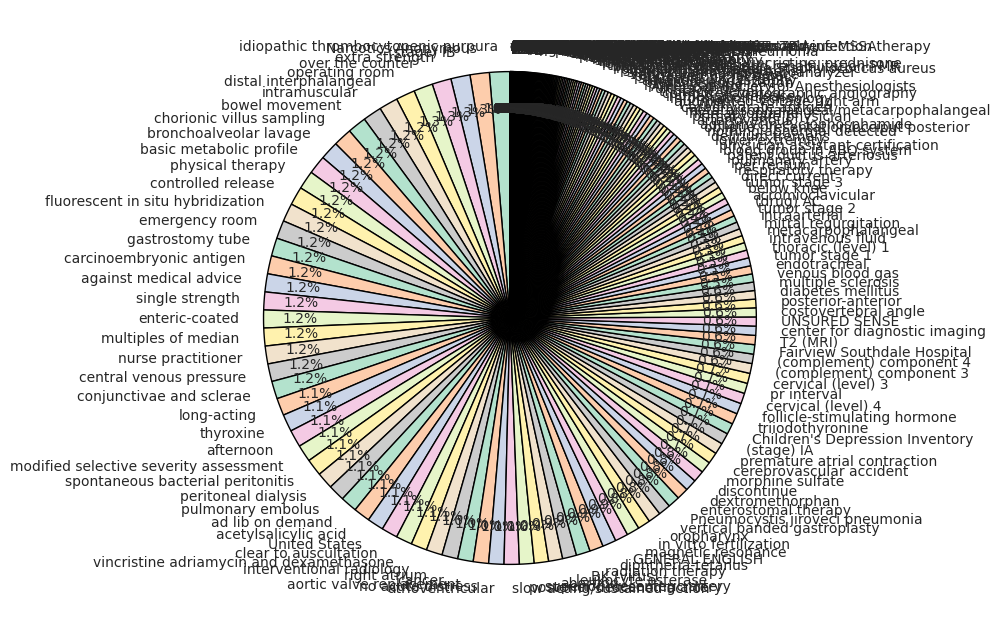

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size and style for a clean look
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Creating the pie chart with additional enhancements
df['long'].value_counts().plot.pie(
    autopct='%1.1f%%',           # Display percentage with one decimal place
    startangle=90,               # Start angle for pie chart
    colors=sns.color_palette('Pastel2'),  # Use a pastel color palette for a softer look
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Add edge color and width for clarity
    pctdistance=0.85             # Distance of the percentage label from the center
)

# Adding title and removing y-axis label
plt.title('', fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide y-axis label

# Displaying the plot
plt.show()


In [ ]:
# Count the number of unique labels
unique_labels = df['long'].nunique()
print(f'Number of unique labels: {unique_labels}')


Number of unique labels: 351


In [ ]:
# Count the number of unique labels
unique_abr = df['abr'].nunique()
print(f'Number of unique abr: {unique_abr}')

Number of unique abr: 75


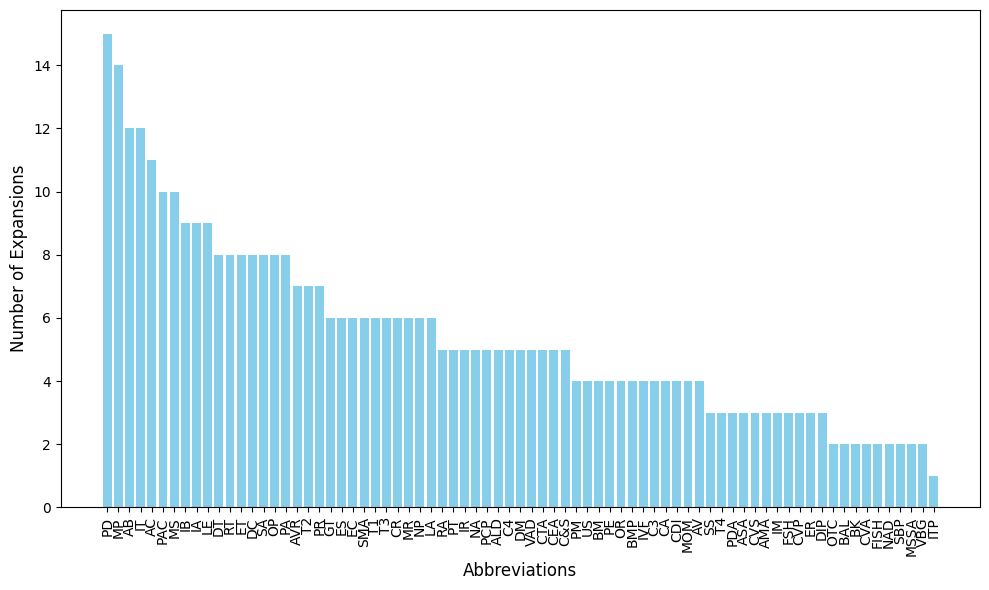

   Abbreviation  Expansion Count
56           PD               15
43           MP               14
0            AB               12
37           IT               12
1            AC               11
..          ...              ...
48          NAD                2
65          SBP                2
46         MSSA                2
74          VBG                2
38          ITP                1

[75 rows x 2 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count unique expansions per abbreviation
expansion_counts = df.groupby('abr')['long'].nunique().reset_index()
expansion_counts.columns = ['Abbreviation', 'Expansion Count']

# Sort by expansion count for better visualization
expansion_counts = expansion_counts.sort_values(by='Expansion Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(expansion_counts['Abbreviation'], expansion_counts['Expansion Count'], color='skyblue')
plt.xlabel('Abbreviations', fontsize=12)
plt.ylabel('Number of Expansions', fontsize=12)
plt.title('', fontsize=14)
#Number of Expansions per Abbreviation
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(expansion_counts)

In [ ]:
# Calculate the mean length of the 'TEXT' column (number of characters)
max_text_length = df['text'].apply(len).max()

# Calculate the mean length of the 'LABEL' column (number of characters)
max_label_length = df['long'].apply(len).max()

# Print the results
print(f"Max length of 'TEXT': {max_text_length}")
print(f"Maxn length of 'LABEL': {max_label_length}")


Max length of 'TEXT': 2708
Maxn length of 'LABEL': 60


In [ ]:
# Calculate mean word count for 'TEXT' and 'LABEL'
mean_text_word_count = df['text'].apply(lambda x: len(x.split())).mean()
mean_label_word_count = df['long'].apply(lambda x: len(x.split())).mean()

print(f"Mean word count of 'TEXT': {mean_text_word_count}")
print(f"Mean word count of 'LABEL': {mean_label_word_count}")


Mean word count of 'TEXT': 59.78837333333333
Mean word count of 'LABEL': 2.2532266666666665


###End of CASI